## gaia/K2/nexsci/cks cross-matched catalogs

* merge Kepler candidates + parallax + FPP (Morton+2016) tables

In [1]:
import numpy as np
#np.warnings.filterwarnings('ignore')
import matplotlib.pyplot as pl
%matplotlib inline
from astropy.table import Table

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1. #set the value globally

# K2 candidates with Gaia parallax

The merged Gaia parallax and Kepler host star data is downloadable from [here](https://www.dropbox.com/s/ahrunxv1jxzkolr/k2_dr2_4arcsec.fits?dl=0) and NExSci column meanings [here](https://exoplanetarchive.ipac.caltech.edu/docs/API_k2_columns.html) and gaia column meanings [here](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html).

In [3]:
datadir='/home/jp/data/gaia/'
k2_data = Table.read(datadir+'k2_dr2_4arcsec.fits', format='fits')

In [4]:
k2_data[:5]

designation,source_id,gaia_ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_primary_flag,duplicated_source,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,phot_variable_flag,l,b,ecl_lon,ecl_lat,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,r_est,r_lo,r_hi,r_length_prior,r_result_flag,r_modality_flag,epic_number,tm_name,k2_campaign_str,k2_type,ra_kepler,dec_kepler,k2_lcflag,k2_scflag,k2_teff,k2_tefferr1,k2_tefferr2,k2_logg,k2_loggerr1,k2_loggerr2,k2_metfe,k2_metfeerr1,k2_metfeerr2,k2_rad,k2_raderr1,k2_raderr2,k2_mass,k2_masserr1,k2_masserr2,k2c_disp,k2c_note,kepler_gaia_ang_dist
,,,deg,0.001 arcsec,deg,0.001 arcsec,0.001 arcsec,0.001 arcsec,,0.001 arcsec / yr,0.001 arcsec / yr,0.001 arcsec / yr,0.001 arcsec / yr,,,,,,,,,,,,mas,,,,ph / s,ph / s,mag,ph / s,ph / s,mag,ph / s,ph / s,mag,mag,mag,mag,km / s,km / s,,deg,deg,deg,deg,K,K,K,mag,mag,mag,mag,mag,mag,solRad,solRad,solRad,solLum,solLum,solLum,pc,pc,pc,pc,,,,,,,deg,deg,,,K,K,K,,,,,,,solRad,solRad,solRad,solMass,solMass,solMass,,,arcsec
bytes28,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,bool,bool,float64,float64,float32,float64,float64,float32,float64,float64,float32,float32,float32,float32,float64,float64,bytes13,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int16,int16,int64,bytes25,bytes2,bytes8,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes14,bytes59,float64
Gaia DR2 2641087471777046016,2641087471777046016,2015.5,353.61626942844623,0.03476750669738084,-1.579984928840809,0.027860544679065846,2.8413389759264085,0.04547754432503811,62.477844,22.317977547367576,0.06772859202836218,10.78010678502776,0.050182961502442607,0.20179896,0.40126076,-0.041583493,-0.26808047,-0.16929291,-0.095513806,0.007934118,-0.110857986,-0.45245445,0.15277624,178.57095,0.0,0.0,True,False,291013.79858859663,72.96138668430945,12.028582,160595.7757711921,317.8107127963336,12.337053,189716.98695448492,148.86025041274434,11.566654,0.7703991,0.30847168,0.4619274,25.785655231017266,1.6907155230047284,NOT_AVAILABLE,83.86039278836442,-58.486373028934665,353.51398413080693,1.0837215610697581,5924.0,5797.096,6267.3335,0.153,0.0697,0.2584,0.0913,0.045,0.1348,1.128296,1.0080627,1.1782357,1.4125408,1.3806776,1.444404,348.494167675347,343.015272075184,354.14767101417,424.99283066036,1,1,60017806,2MASS J23342787-0134482,E,N/A,353.616152,-1.580064,1,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N/A,N/A,0.5095138947773311
Gaia DR2 2641087471777046016,2641087471777046016,2015.5,353.61626942844623,0.03476750669738084,-1.579984928840809,0.027860544679065846,2.8413389759264085,0.04547754432503811,62.477844,22.317977547367576,0.06772859202836218,10.78010678502776,0.050182961502442607,0.20179896,0.40126076,-0.041583493,-0.26808047,-0.16929291,-0.095513806,0.007934118,-0.110857986,-0.45245445,0.15277624,178.57095,0.0,0.0,True,False,291013.79858859663,72.96138668430945,12.028582,160595.77577119

convert table to pandas

In [5]:
df1 = k2_data.to_pandas()
df1.head()

,designation,source_id,gaia_ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,...,k2_metfeerr2,k2_rad,k2_raderr1,k2_raderr2,k2_mass,k2_masserr1,k2_masserr2,k2c_disp,k2c_note,kepler_gaia_ang_dist
0,b'Gaia DR2 2641087471777046016',2.641087e+18,2015.5,353.616269,0.034768,-1.579985,0.027861,2.841339,0.045478,62.477844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'N/A',b'N/A',0.509514
1,b'Gaia DR2 2641087471777046016',2.641087e+18,2015.5,353.616269,0.034768,-1.579985,0.027861,2.841339,0.045478,62.477844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'N/A',b'N/A',0.509514
2,b'Gaia DR2 2634212328648066560',2.634212e+18,2015.5,352.388214,0.042030,-3.768873,0.031351,3.260346,0.046458,70.177933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'N/A',b'N/A',0.424714
3,b'Gaia DR2 2634212328648066560',2.634212e+18,2015.5,352.388214,0.042030,-3.768873,0.031351,3.260346,0.046458,70.177933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'N/A',b'N/A',0.424714
4,b'Gaia DR2 2740066749756528384',2.740067e+18,2015.5,1.157646,0.040951,3.550331,0.021344,1.232810,0.039225,31.429239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'N/A',b'N/A',0.235772


In [6]:
df1.shape

(348144, 95)

In [7]:
np.unique(df1['k2c_disp'])

array([b'CANDIDATE', b'CONFIRMED', b'FALSE POSITIVE', b'N/A'],
      dtype=object)

In [8]:
df1.columns

Index(['designation', 'source_id', 'gaia_ref_epoch', 'ra', 'ra_error', 'dec',
       'dec_error', 'parallax', 'parallax_error', 'parallax_over_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr',
       'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_primary_flag',
       'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_mag', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_flux_error',
       'phot_rp_mean_mag', 'bp_rp', 'bp_g', 'g_rp', 'radial_velocity',
       'radial_velocity_error', 'phot_variable_flag', 'l', 'b', 'ecl_lon',
       'ecl_lat', 'teff_val', 'teff_percentile_lower', 'teff_percentile_upper',
       'a_g_v

In [9]:
df1['epic_number'] = df1['epic_number'].astype(int)

## Mayo+2018 FPP
The table is not yet available in Vizier, using [astropy.astroquery.Vizier](http://astroquery.readthedocs.io/en/latest/vizier/vizier.html)

* fetch [Table 2](https://gateway.itc.u-tokyo.ac.jp/1538-3881/155/3/136/suppdata/,DanaInfo=iopscience.iop.org+ajaaadfft2_mrt.txt) of [Mayo+2018](http://adsabs.harvard.edu/abs/2015arXiv151202643H) (needs VPN!).
* same table available in [Gsheet](https://docs.google.com/spreadsheets/d/1dwharWE3yrIzpoxeAMbK5IA3gZtooSGK8UdZWeNvztU/edit#gid=0) where empty cells are filled with NaNs
* other potential lists: [Huber+2016](http://adsabs.harvard.edu/abs/2015arXiv151202643H)

In [10]:
import pandas as pd
colnames = 'K2,EPIC,T0,E_T0,e_T0,P,E_P,e_P,a/R*,E_a/R*,e_a/R*,inc,E_inc,e_inc,Rp/R*,E_Rp/R*,e_Rp/R*,Rp/Re,E_Rp/Re,e_Rp/Re,R*,E_R*,e_R*,M*,E_M*,e_M*,Kpmag,FPP,Disp,Note'.split(',')

fname='../data/Mayo2018_table2_filled_NaNs.txt'
df2=pd.read_csv(fname,skiprows=65,delim_whitespace=True)
df2.columns = colnames
df2.head()

,K2,EPIC,T0,E_T0,e_T0,P,E_P,e_P,a/R*,E_a/R*,...,R*,E_R*,e_R*,M*,E_M*,e_M*,Kpmag,FPP,Disp,Note
0,NaN,2.011116e+08,2750.1621,0.0021,0.0021,2.302370,0.000110,0.000100,12.60,2.80,...,0.711,0.019,0.020,0.746,0.023,0.023,11.363,1.22E-03,Candidate,NaN
1,NaN,2.011275e+08,2752.5513,0.0011,0.0012,6.178370,0.000190,0.000170,17.30,1.10,...,0.789,0.025,0.017,0.857,0.021,0.023,11.558,NaN,Candidate,c
2,K2-157b,2.011302e+08,2749.8239,0.0032,0.0033,0.365257,0.000029,0.000029,1.88,0.32,...,0.876,0.045,0.025,0.940,0.023,0.027,12.604,<1.00E-04,Planet,NaN
3,K2-158b,2.011327e+08,2757.4817,0.0096,0.0092,10.062100,0.002300,0.002200,17.60,2.90,...,0.892,0.074,0.036,0.933,0.027,0.030,11.678,<1.00E-04,Planet,NaN
4,NaN,2.011667e+08,2765.1930,0.0210,0.0160,18.105000,0.010000,0.013000,26.30,5.30,...,1.220,0.120,0.070,1.192,0.033,0.030,10.897,1.73E-03,Candidate,NaN


In [11]:
df2.columns

Index(['K2', 'EPIC', 'T0', 'E_T0', 'e_T0', 'P', 'E_P', 'e_P', 'a/R*', 'E_a/R*',
       'e_a/R*', 'inc', 'E_inc', 'e_inc', 'Rp/R*', 'E_Rp/R*', 'e_Rp/R*',
       'Rp/Re', 'E_Rp/Re', 'e_Rp/Re', 'R*', 'E_R*', 'e_R*', 'M*', 'E_M*',
       'e_M*', 'Kpmag', 'FPP', 'Disp', 'Note'],
      dtype='object')

In [12]:
df2['epic_number'] = df2['EPIC'].astype(int)

## NExSci 

* fetch K2 candidate planet properties from [nexsci](https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html) ([csv](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=k2candidates)).
* [Interactive table](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=k2candidates)

In [13]:
import pandas as pd

refresh = False

fname = '../data/k2_candidate_nexsci.csv'
if refresh:
    epic_link='https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=k2candidates&select=*'
    epic = pd.read_csv(koi_link)
    epic.to_csv(fname)
else:
    epic = pd.read_csv(fname)
    
epic.shape

(1417, 149)

In [14]:
epic.tail()

,epic_name,tm_name,epic_candname,pl_name,ra,ra_err,ra_str,dec,dec_err,dec_str,...,pl_radjlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_tranflag
1412,EPIC 218170789,2MASS J18510667-1917041,EPIC 218170789.01,NaN,282.777832,0.0,18h51m06.68s,-19.284481,0.0,-19d17m04.1s,...,0.0,8.989,15.062,-5.040,0.0,NaN,NaN,NaN,NaN,1.0
1413,EPIC 218304292,2MASS J19125385-1902401,EPIC 218304292.01,NaN,288.224426,0.0,19h12m53.86s,-19.044497,0.0,-19d02m40.2s,...,0.0,3.458,0.836,-0.529,0.0,NaN,NaN,NaN,NaN,1.0
1414,EPIC 218668602,2MASS J18480209-1822454,EPIC 218668602.01,NaN,282.008728,0.0,18h48m02.09s,-18.379305,0.0,-18d22m45.5s,...,0.0,1.859,0.295,-0.143,0.0,NaN,NaN,NaN,NaN,1.0
1415,EPIC 218916923,2MASS J19161596-1754384,EPIC 218916923.01,K2-139 b,289.066528,0.0,19h16m15.97s,-17.910688,0.0,-17d54m38.5s,...,0.0,9.268,0.422,-0.306,0.0,NaN,NaN,NaN,NaN,1.0
1416,EPIC 219388192,2MASS J19173402-1652177,EPIC 219388192.01,NaN,289.391815,0.0,19h17m34.04s,-16.871611,0.0,-16d52m17.8s,...,0.0,9.978,0.913,-0.466,0.0,NaN,NaN,NaN,NaN,1.0


In [15]:
np.unique(epic['k2c_disp'])

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [16]:
#get only candidates
mask = epic['k2c_disp'] != 'CONFIRMED'
df3 = epic[mask]
df3.shape

(784, 149)

In [17]:
len(df3[epic['k2c_disp'] == 'FALSE POSITIVE'])

/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


78

In [18]:
df3.head()

,epic_name,tm_name,epic_candname,pl_name,ra,ra_err,ra_str,dec,dec_err,dec_str,...,pl_radjlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_tranflag
0,EPIC 205999468,2MASS J22213759-1450221,EPIC 205999468.01,NaN,335.406616,0.0,22h21m37.59s,-14.839480,0.0,-14d50m22.1s,...,0.0,2.16,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0
4,EPIC 206011496,2MASS J22480755-1429407,EPIC 206011496.01,NaN,342.031525,0.0,22h48m07.57s,-14.494689,0.0,-14d29m40.9s,...,0.0,1.63,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0
7,EPIC 206024342,2MASS J22050653-1407180,EPIC 206024342.01,NaN,331.277222,0.0,22h05m06.53s,-14.121665,0.0,-14d07m18.0s,...,0.0,2.94,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0
8,EPIC 206024342,2MASS J22050653-1407180,EPIC 206024342.02,NaN,331.277222,0.0,22h05m06.53s,-14.121665,0.0,-14d07m18.0s,...,0.0,1.35,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0
15,EPIC 206028176,2MASS J22011206-1400524,EPIC 206028176.01,NaN,330.300293,0.0,22h01m12.07s,-14.014557,0.0,-14d00m52.4s,...,0.0,2.86,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0


In [19]:
#remove EPIC in epic name
df3['epic_number'] = epic['epic_name'].apply(lambda x: x.split(' ')[-1]).astype('str')
df3.shape

/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(784, 150)

## Merging tables
* use key='epic_number'
* see epic column meanings [here]()

Merge the 'outer'=union of epic columns of df2 and df3

In [20]:
df23 = pd.merge(df2, df3, how='outer', on='epic_number')
df23.shape

(1058, 180)

In [21]:
df_all = pd.merge(df1, df23, how='inner', on='epic_number')
df_all.shape

(1655, 274)

In [22]:
len(np.unique(df_all['epic_number']))

615

In [23]:
df_all['epic_name,epic_candname,parallax,Note'.split(',')].head()

,epic_name,epic_candname,parallax,Note
0,NaN,NaN,10.261646,NaN
1,EPIC 201111557,EPIC 201111557.01,10.261646,NaN
2,EPIC 201126503,EPIC 201126503.01,3.434496,NaN
3,NaN,NaN,8.467510,c
4,EPIC 201127519,EPIC 201127519.01,8.467510,NaN


In [24]:
df_all.columns.tolist()

['designation',
 'source_id',
 'gaia_ref_epoch',
 'ra_x',
 'ra_error',
 'dec_x',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_primary_flag',
 'duplicated_source',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_mag',
 'phot_bp_mean_flux',
 'phot_bp_mean_flux_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux',
 'phot_rp_mean_flux_error',
 'phot_rp_mean_mag',
 'bp_rp',
 'bp_g',
 'g_rp',
 'radial_velocity',
 'radial_velocity_error',
 'phot_variable_flag',
 'l',
 'b',
 'ecl_lon',
 'ecl_lat',
 'teff_val',
 'teff_percentile_lower',
 'teff_percentile_upper',
 'a_g_val',
 'a_g_percentile_lower',
 'a_g_percentile_up

Comparing stellar radii from different tables

(0, 10)

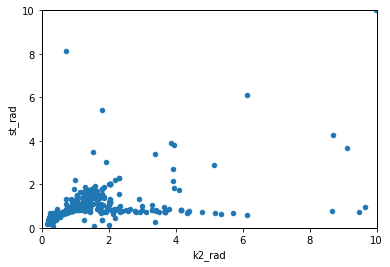

In [25]:
#k2_rad came from gaia-kepler.fun and st_rad came from nexsci; they're supposed to be the same
df_all.plot(x='k2_rad',y='st_rad',kind='scatter')
pl.ylim(0,10)
pl.xlim(0,10)

(0, 10)

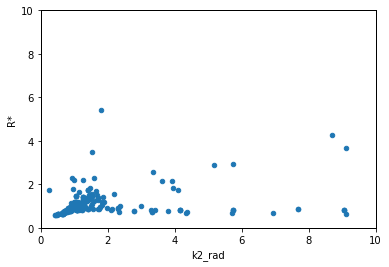

In [26]:
#k2_rad came from gaia-kepler.fun; R* from Mayo+18
df_all.plot(x='k2_rad',y='R*',kind='scatter')
pl.ylim(0,10)
pl.xlim(0,10)

## Adding constraints

Kepler confirmed+candidates
* without planet mass measurement, 
* bright (Mv<14), 
* low FPP (fpp<0.5)
* large depth (d>1mmag), 
* large expected K>1m/s, 
* period < 50 d
* t23/t14 > 0.5

In [27]:
def inclination(a, b, e=None, w=None):
    """
    Winn 2014 ("Transits and Occultations"), eq. 7
    """
    # if e is None and w is None:
    #     return np.arccos(b / a)
    # elif e is not None and w is not None:
    #     return np.arccos(b / a * (1 + e * np.sin(w)) / (1 - e**2))
    # else:
    #     return np.nan
    return np.arccos(b / a)

def t14_circ(p, a, k, b):
    """
    Winn 2014 ("Transits and Occultations"), eq. 14
    """
    i = inclination(a, b)
    alpha = np.sqrt( (1 + k)**2 - b**2 )
    return (p / np.pi) * np.arcsin( alpha / np.sin(i) / a )


def t23_circ(p, a, k, b):
    """
    Winn 2014 ("Transits and Occultations"), eq. 15
    """
    i = inclination(a, b)
    alpha = np.sqrt( (1 - k)**2 - b**2 )
    return (p / np.pi) * np.arcsin( alpha / np.sin(i) / a )


def tau_circ(p, a, k, b):
    """
    Winn 2014 ("Transits and Occultations"), eq. 18
    """
    return p / np.pi / a * k / np.sqrt(1 - b**2)


def tshape_approx(a, k, b):
    """
    Seager & Mallen-Ornelas 2003, eq. 15
    """
    i = inclination(a, b)
    alpha = (1 - k)**2 - b**2
    beta = (1 + k)**2 - b**2
    return np.sqrt( alpha / beta )


def max_k(tshape):
    """
    Seager & Mallen-Ornelas 2003, eq. 21
    """
    return (1 - tshape) / (1 + tshape)

Convert FPP limits to normal values so a mask (<50%) can be evaluated. 
Also use reported value in NExSci if Mayo+2018 value is unknown.

In [29]:
fpp = []
for idx in df_all.index:
    i= df_all.loc[idx,'FPP']
    if type(i)==str:
        if i[0]=='<':
            i=float(i[1:])
        else:
            i=float(i)
    elif type(i)==float:
        #np.nan
        #pass
        i=df_all.loc[idx,'pl_fppprob']
    else:
        #report some other value
        print(i)
    fpp.append(i)
    
df_all['fpp'] = fpp

In [31]:
df_all[['FPP','pl_fppprob']].head()

,FPP,pl_fppprob
0,1.22E-03,NaN
1,NaN,0.00122
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


Upon checking, there is no discrepancy in fpp prob reported in NExSci because its main source for fpp is Mayo+2018 too.

In [32]:
df_all['fpp'].dropna().shape

(551,)

In [33]:
k = df_all['Rp/R*'] #['pl_ratror']
a = df_all['a/R*'] #['pl_ratdor']
b = df_all['pl_imppar'].fillna(0) #assumes circular orbit
p = df_all['P']
#t14 = df_all['pl_trandur']

#if trandur is not reported, calculate it
t14 =[]
for n,i in enumerate(df_all.index):
    if np.isnan(df_all.loc[i,'pl_trandur']):
        t14.append(t14_circ(p[n], a[n], k[n], b[n])*24) #assumes circular orbit
    else:
        t14.append(df_all.loc[i,'pl_trandur'])

df_all['t23_hr'] = t23_circ(p, a, k, b)*24
tshape = df_all['t23_hr']/t14
#tshape = tshape_approx(a, k, b)
df_all['shape'] = tshape
df_all['max_k'] = max_k(tshape)

df_all['shape'].dropna().shape

(385,)

In [34]:
#compare reported and calculated transit durations
np.c_[tshape,df_all['t23_hr']/t14]

array([[0.9666928 , 0.9666928 ],
       [       nan,        nan],
       [       nan,        nan],
       ...,
       [       nan,        nan],
       [0.94273117, 0.94273117],
       [       nan,        nan]])

In [35]:
for i in 'Rp/R*,a/R*,pl_imppar,P'.split(','):
    print(df_all[i].dropna().shape)

(385,)
(385,)
(592,)
(385,)


In [36]:
low_fpp = df_all['fpp'] < 0.5 #df_all['pl_fpprob]
cand    = df_all['k2c_disp_y'] != 'CONFIRMED'
bright  = df_all['Kpmag'] < 12.0
boxy    = df_all['shape'] > 0.5
long_period = df_all['P'] < 40
nearby  = df_all['parallax'] > 1 #mas
#deep   = df_all['pl_trandep'] > 1

idx = low_fpp & cand & bright & long_period & nearby & boxy 

df = df_all[idx]
df.shape

(93, 278)

In [37]:
#selected
df.head()

,designation,source_id,gaia_ref_epoch,ra_x,ra_error,dec_x,dec_error,parallax,parallax_error,parallax_over_error,...,pl_radelim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_tranflag,fpp,t23_hr,shape,max_k
0,b'Gaia DR2 3596276829630866432',3.596277e+18,2015.5,183.846245,0.038110,-6.268329,0.027178,10.261646,0.048551,211.358032,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001220,1.373742,0.966693,0.016936
6,b'Gaia DR2 3596003497911958528',3.596003e+18,2015.5,179.939708,0.038314,-5.721688,0.022276,5.040304,0.052014,96.903725,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000100,4.251351,0.947175,0.027129
7,b'Gaia DR2 3597570989175080576',3.597571e+18,2015.5,181.121142,0.041479,-4.899136,0.031772,3.719138,0.048381,76.871841,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001730,5.177655,0.969071,0.015708
12,b'Gaia DR2 3597981377595128704',3.597981e+18,2015.5,183.468649,0.040301,-3.831810,0.030394,4.668911,0.052439,89.035309,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002100,4.654415,0.966559,0.017005
14,b'Gaia DR2 3600851450836925312',3.600851e+18,2015.5,180.540890,0.042419,-3.580905,0.022507,5.819674,0.047958,121.348618,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000353,3.547757,0.952340,0.024412


In [38]:
cols = 'epic_number,pl_trandep,max_k,shape,Kpmag,radius_val,R*,M*,FPP,parallax,P,pl_imppar,Note'.split(',')
df[cols].sort_values(by='max_k')#(by='pl_trandep')

,epic_number,pl_trandep,max_k,shape,Kpmag,radius_val,R*,M*,FPP,parallax,P,pl_imppar,Note
650,211491383,NaN,0.008437,0.983268,11.785,1.469867,1.310,1.101,2.40E-03,2.748365,4.145400,NaN,NaN
642,211491383,NaN,0.008437,0.983268,11.785,1.469867,1.310,1.101,2.40E-03,2.748365,4.145400,NaN,NaN
654,211491383,NaN,0.008437,0.983268,11.785,1.469867,1.310,1.101,2.40E-03,2.748365,4.145400,NaN,NaN
658,211491383,NaN,0.008437,0.983268,11.785,1.469867,1.310,1.101,2.40E-03,2.748365,4.145400,NaN,NaN
662,211491383,NaN,0.008437,0.983268,11.785,1.469867,1.310,1.101,2.40E-03,2.748365,4.145400,NaN,NaN
666,211491383,NaN,0.008437,0.983268,11.785,1.469867,1.310,1.101,2.40E-03,2.748365,4.145400,NaN,NaN
670,211491383,NaN,0.008437,0.983268,11.785,1.469867,1.310,1.101,2.40E-03,2.748365,4.145400,NaN,NaN
646,211491383,NaN,0.008437,0.983268,11.785,1.469867,1.310,1.101,2.40E-03,2.748365,4.145400,NaN,NaN
1621,228721452,NaN,0.008484,0.983176,11.325,0.975181,1.013,1.067,<1.00E-04,5.007438,0.505570,NaN,NaN
1569,220250254,NaN,0.008965,0.982229,11.507,0.863644,0.852,0.912,2.31E-04,5.637298,0.570233,NaN,NaN


In [39]:
def unc_ave(mid,upper,lower):
    return (abs(mid-upper)+abs(mid-lower))/2

In [ ]:
df['st_teff']

In [ ]:
cols = 'epic_number,teff_prov,logg_prov,feh_prov,teff,uteff,logg,ulogg,feh,ufeh,koi_jmag,koi_jmag_err,koi_hmag,koi_hmag_err,koi_kmag,koi_kmag_err,parallax,parallax_error,radial_velocity,radial_velocity_error,FPP,planet?,koi_kepmag,koi_period_y,koi_depth_y,shape,cks_svsini,mass,radius,rho_star'.split(',')

#save
df[idx][cols]
#.to_csv('kepler_candidates.csv')

In [ ]:
cols=''
selected[cols]